In [33]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [35]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [36]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [37]:
X = fruits[['mass', 'width', 'height']]
y = fruits[['fruit_label']]
#random state parameter allows to produce the same split every time
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [38]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [39]:
from matplotlib import cm

X_new = fruits[['mass', 'width', 'height', 'color_score']]
X_train_new, X_test_new, y_train, y_test = train_test_split(X, y, random_state = 0)

<IPython.core.display.Javascript object>


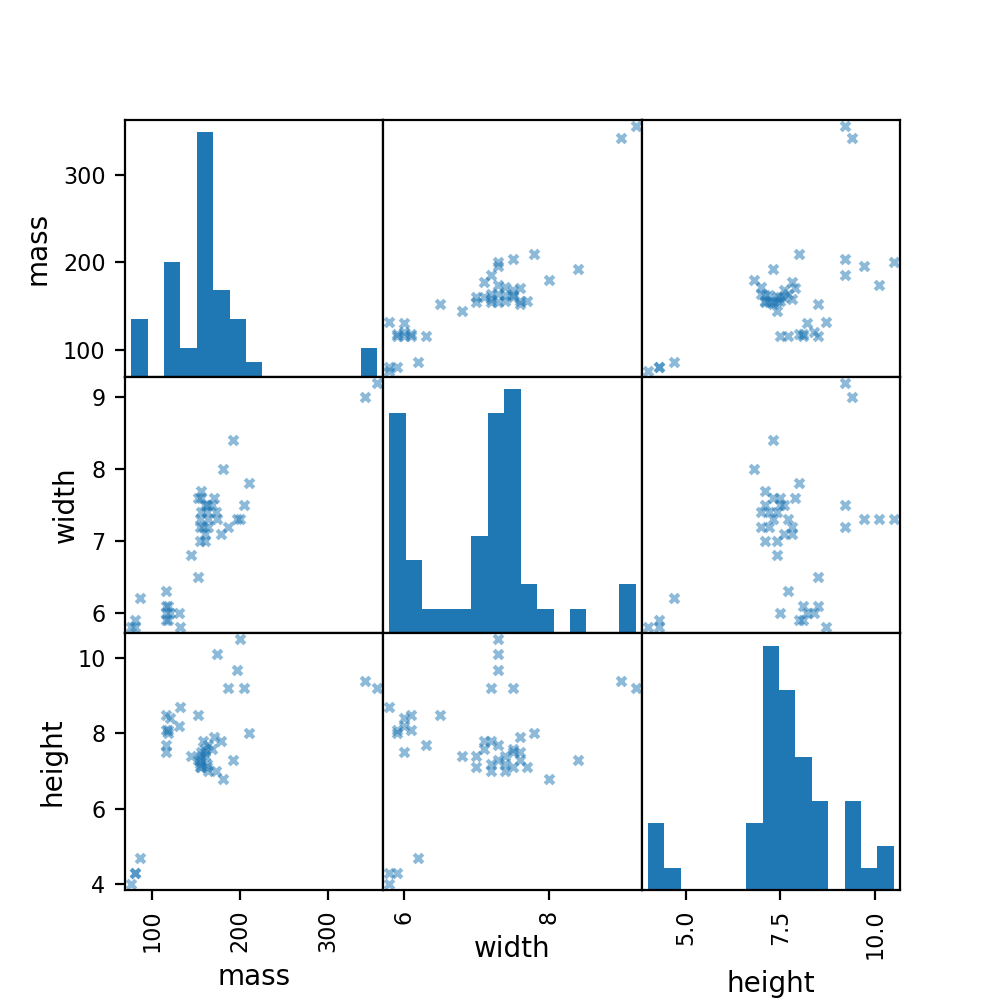

In [40]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train_new, marker = 'x', hist_kwds={'bins':15}, s = 10, figsize = (5,5), cmap = cmap)

<IPython.core.display.Javascript object>


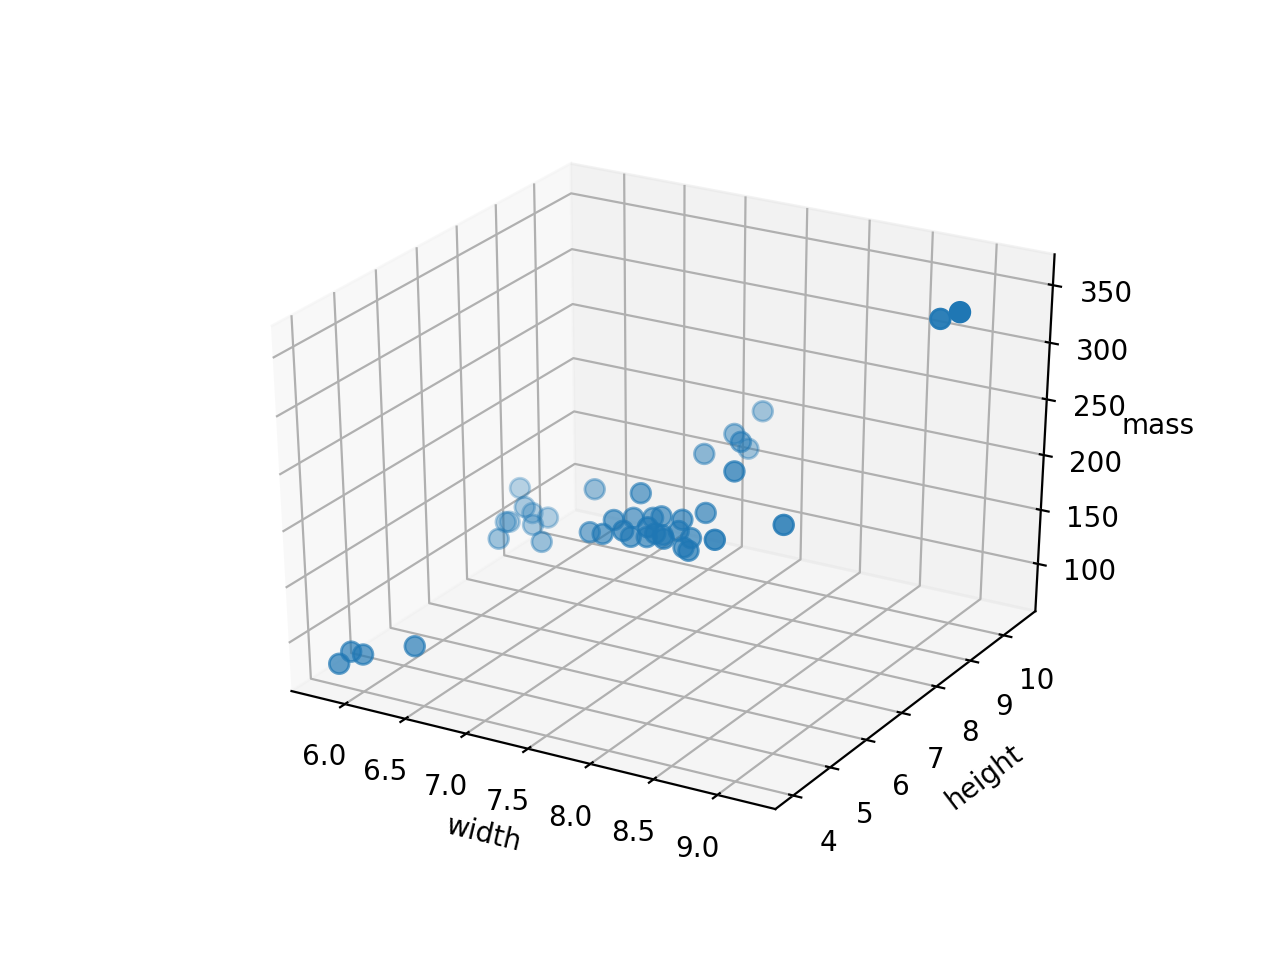

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train_new['width'], X_train_new['height'], X_train_new['mass'], marker = 'o', s=50)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

#### KNN Classifier - Instance based supervised learning:
    1 - find most similar instances (X_NN) to x_test that are in x_train
    2 - get the labels Y_NN for the instances in X_NN 
    3 - predict the label for x_test by combining the labels y_NN eg simple majority vote

#### Define distance metric: Typically euclidean (Minkowski)
#### How many nn to look at?
#### Optional weighting function ont he neighbor points
#### Method for aggregating the classes of neighbor points

In [42]:
lookup = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [43]:
#Will use 2 D training set for graphing purposes:
X_train = X_train[['height', 'width']]
X_test = X_test[['height', 'width']]

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [45]:
knn.fit(np.array(X_train), np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
knn.score(np.array(X_test), y_test)

0.6

In [48]:
fruit_prediction = knn.predict([[29,4]])
fruit_prediction

array([4])

In [49]:
lookup[4]

'lemon'

##### Larger values of K allow smoother decision boundary (more bias) but less likely to overfit
##### In other words, the classifier will produce a smoother boundary that is less sensitive to each labeled data point
##### With higher K, higher number of neighbors (i.e. K neighbors) are considered to decide how to label points, so the labeling will be less sensitive to each individual point's label
##### K is the complexity parameter for KNN

In [50]:
X_train.min()

height    4.0
width     5.8
dtype: float64

In [51]:
x_min, x_max = int(X_train.height.min() - 7), int(X_train.height.max() + 7)
y_min, y_max = int(X_train.width.min() - 7), int(y_train.max() + 7)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

In [52]:
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])

In [53]:
Z = Z.reshape(xx.shape)

In [54]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<IPython.core.display.Javascript object>


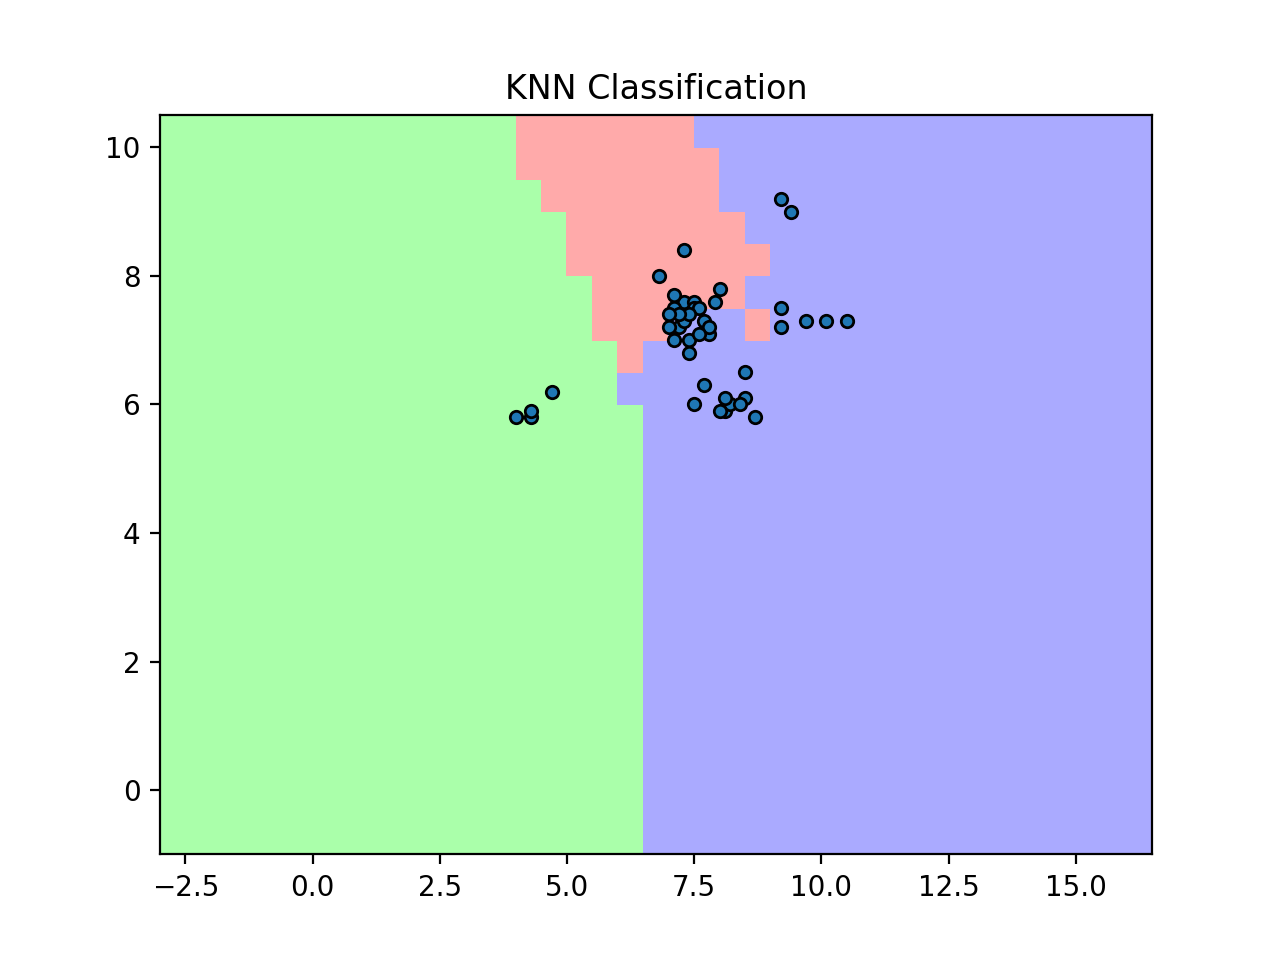

In [55]:
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = cmap_light)
plt.scatter(X_train.height, X_train.width, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.show()

Now we redo this with a higher K:

In [58]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(np.array(X_train), np.ravel(y_train))
knn.score(np.array(X_test), y_test)

0.4

In [59]:
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

<IPython.core.display.Javascript object>


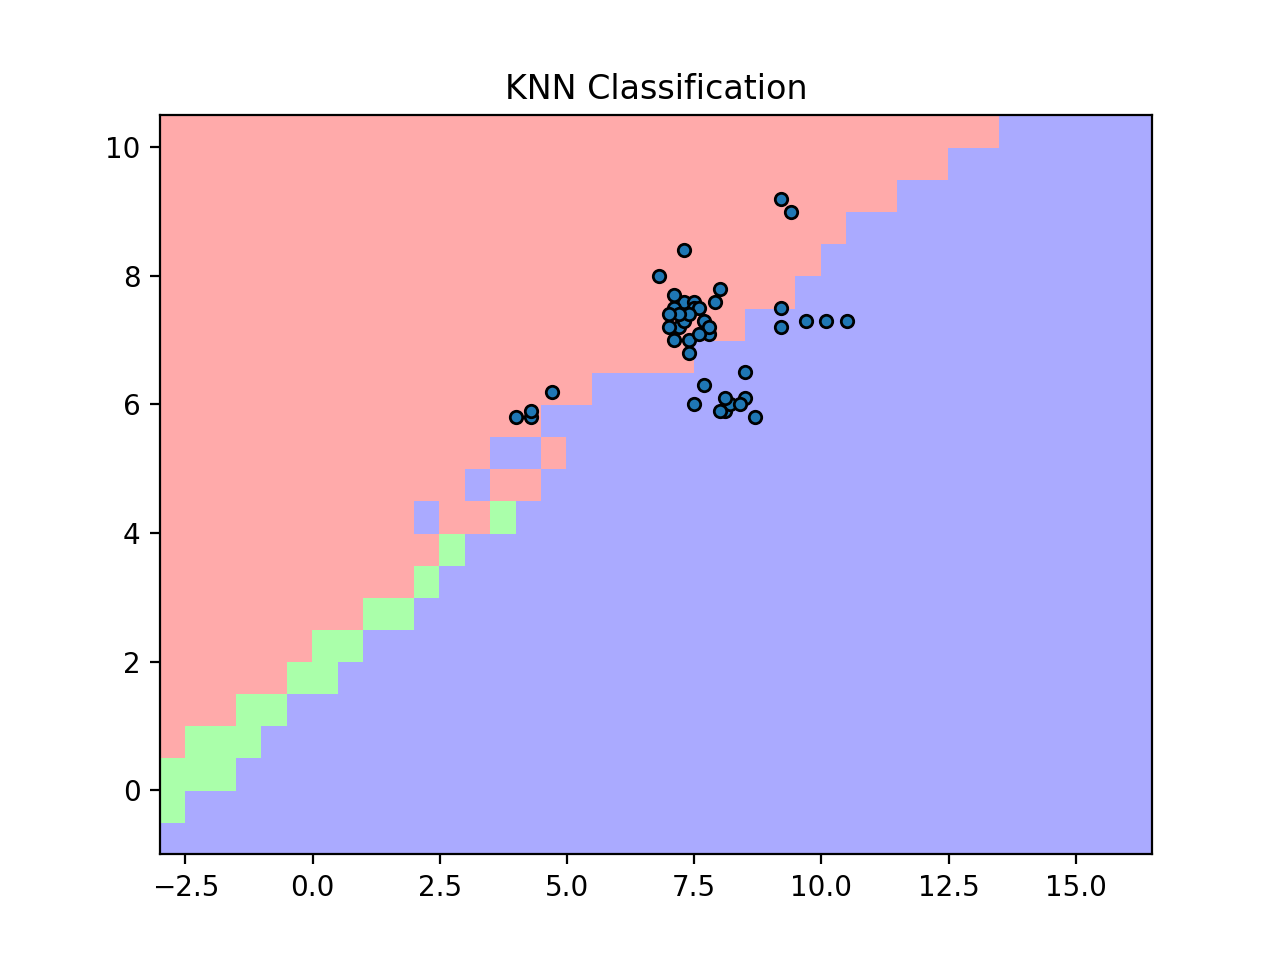

In [60]:
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = cmap_light)
plt.scatter(X_train.height, X_train.width, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.show()

Notice the boundary has become much less sensitive to each data point, but we have produced a very biased model as the class boundary does not reflect the data points at all